In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pointbiserialr, chi2_contingency, ranksums
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("data_set.csv")

In [5]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [36]:
df.shape

(253680, 22)

In [75]:
categorical = []
i=1
for feat in df.columns:
    if feat == "Stroke": continue
    unique = np.unique(df[feat])
    if len(unique) == 2:
        print(f"{i} - Feature {feat} é categórica com duas classes")
        categorical.append(feat)
        i-=-1
    if len(unique) == 3: # só para ter certeza que não tem nenhuma features com três categorias
        print(f"ATENÇÃO - Feature {feat} é categórica com três classes")

ATENÇÃO - Feature Diabetes_012 é categórica com três classes
1 - Feature HighBP é categórica com duas classes
2 - Feature HighChol é categórica com duas classes
3 - Feature CholCheck é categórica com duas classes
4 - Feature Smoker é categórica com duas classes
5 - Feature HeartDiseaseorAttack é categórica com duas classes
6 - Feature PhysActivity é categórica com duas classes
7 - Feature Fruits é categórica com duas classes
8 - Feature Veggies é categórica com duas classes
9 - Feature HvyAlcoholConsump é categórica com duas classes
10 - Feature AnyHealthcare é categórica com duas classes
11 - Feature NoDocbcCost é categórica com duas classes
12 - Feature DiffWalk é categórica com duas classes
13 - Feature Sex é categórica com duas classes


In [67]:
results = {}
for feat in categorical:
    hasFeat_stroke = df[(df[feat]==1.0) & (df["Stroke"]==1.0)][feat].values.shape[0]
    hasFeat_notStroke = df[(df[feat]==1.0) & (df["Stroke"]==0.0)][feat].values.shape[0]

    notFeat_stroke = df[(df[feat]==0.0) & (df["Stroke"]==1.0)][feat].values.shape[0]
    notFeat_notStroke = df[(df[feat]==0.0) & (df["Stroke"]==0.0)][feat].values.shape[0]

    cont_table = [[hasFeat_stroke, hasFeat_notStroke],
                  [notFeat_stroke, notFeat_notStroke]]
    results[feat] = chi2_contingency(cont_table)

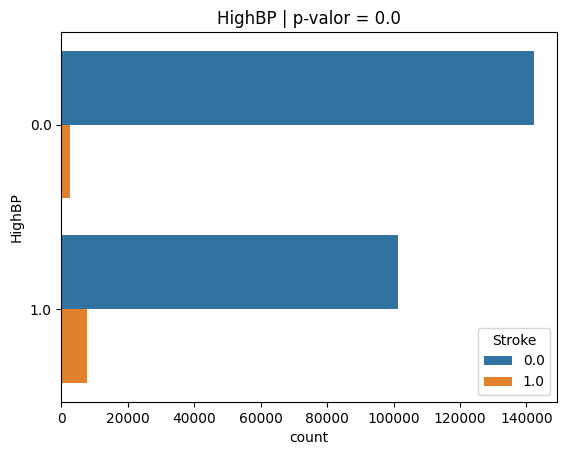

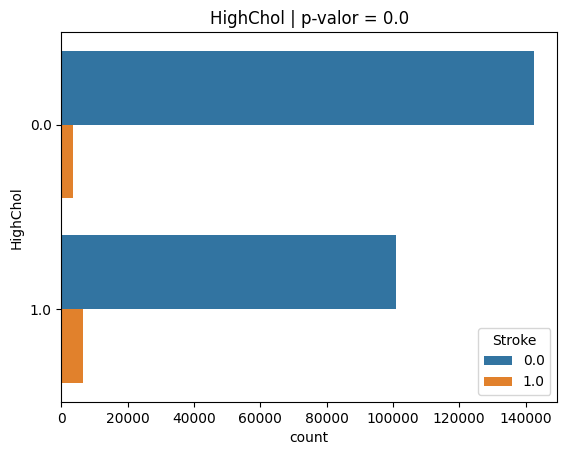

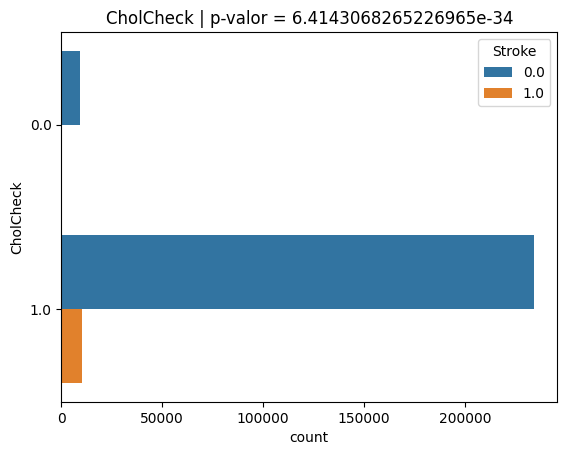

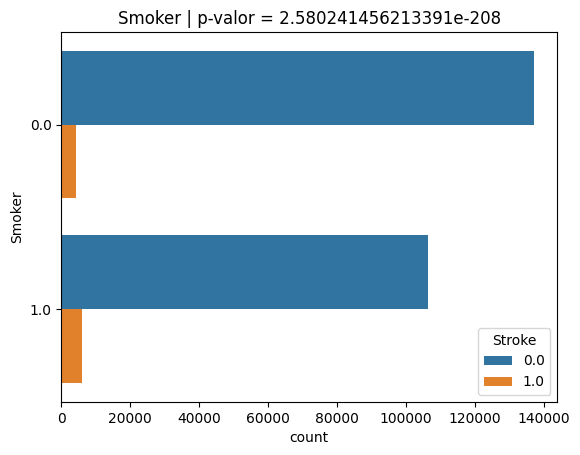

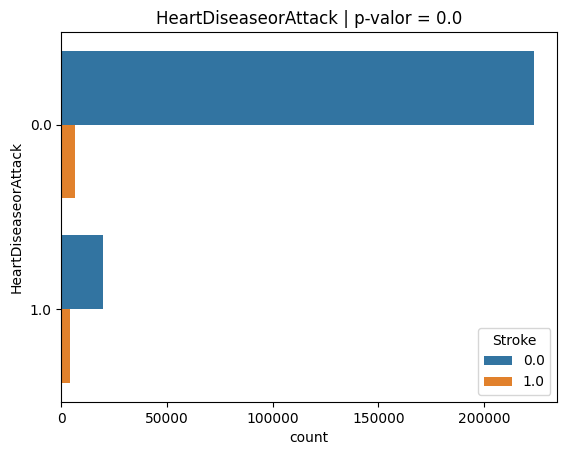

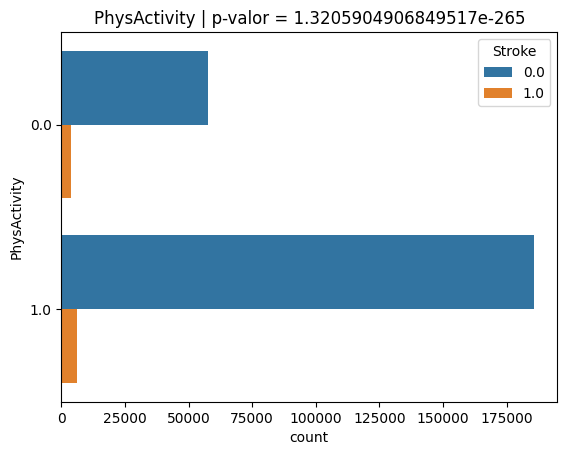

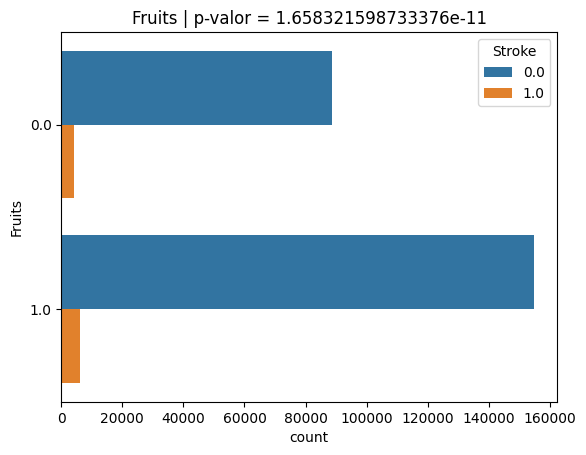

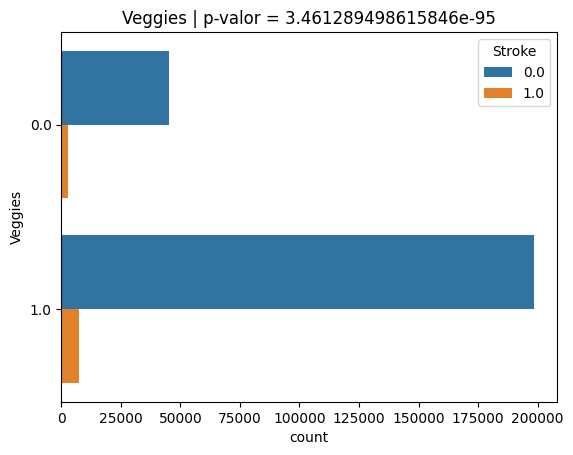

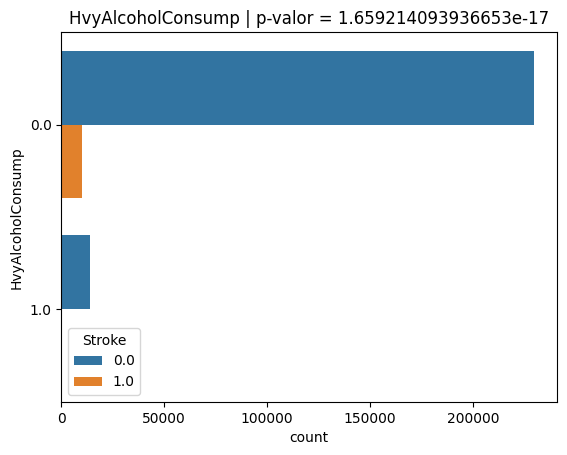

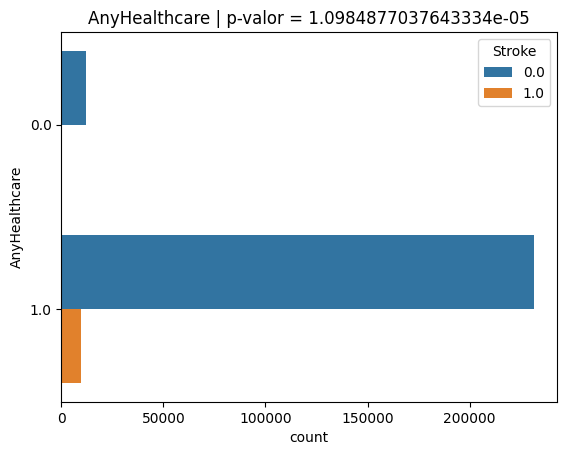

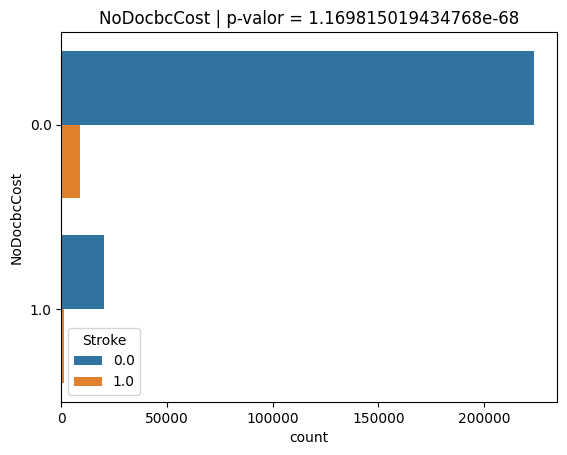

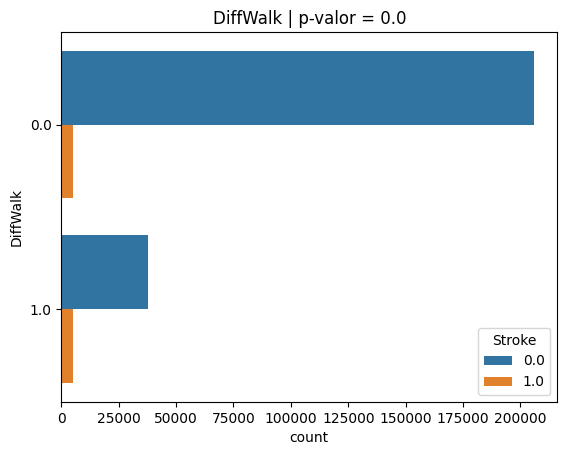

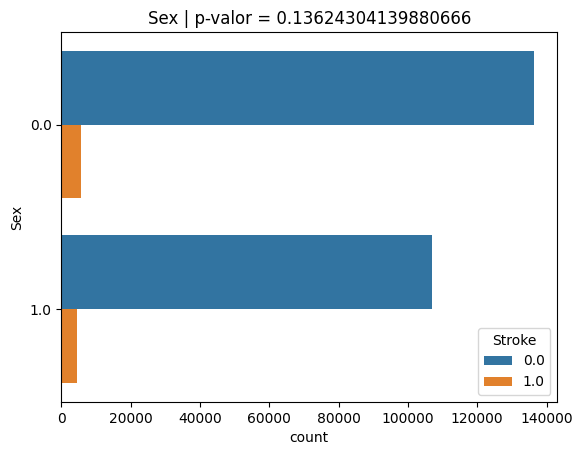

In [62]:
for feat in categorical:
    fig, ax = plt.subplots()
    bp = sns.countplot(data=df, hue="Stroke", y=feat, ax=ax)
    pvalue = results[feat].pvalue
    ax.set_title(f"{feat} | p-valor = {pvalue}")

Pelos tests, a variável "Sex" não diferencia muito quem teve ou não teve um infarto.Talvez seja melhor não usa-la

In [70]:
non_categorical = []

for feat in df.columns:
    if feat == "Stroke": continue
    if feat in categorical: continue
    non_categorical.append(feat)

In [72]:
# verificando variávels não categóricas
df[non_categorical]

,Diabetes_012,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
0,0.0,40.0,5.0,18.0,15.0,9.0,4.0,3.0
1,0.0,25.0,3.0,0.0,0.0,7.0,6.0,1.0
2,0.0,28.0,5.0,30.0,30.0,9.0,4.0,8.0
3,0.0,27.0,2.0,0.0,0.0,11.0,3.0,6.0
4,0.0,24.0,2.0,3.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...
253675,0.0,45.0,3.0,0.0,5.0,5.0,6.0,7.0
253676,2.0,18.0,4.0,0.0,0.0,11.0,2.0,4.0
253677,0.0,28.0,1.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,23.0,3.0,0.0,0.0,7.0,5.0,1.0


Variável Diabetes_012 é categórica com 3 classes

Depois lido com ela

In [88]:
g_stroke = df[df["Stroke"] == 1.0]['Education']
g_noStroke = df[df["Stroke"] == 0.0]['Education']

In [85]:
results_continuous = {}
for feat in non_categorical:
    if feat == "Diabetes_012": continue

    g_stroke = df[df["Stroke"] == 1.0][feat]
    g_noStroke = df[df["Stroke"] == 0.0][feat]

    s, p = ranksums(g_stroke, g_noStroke)

    results_continuous[feat] = p

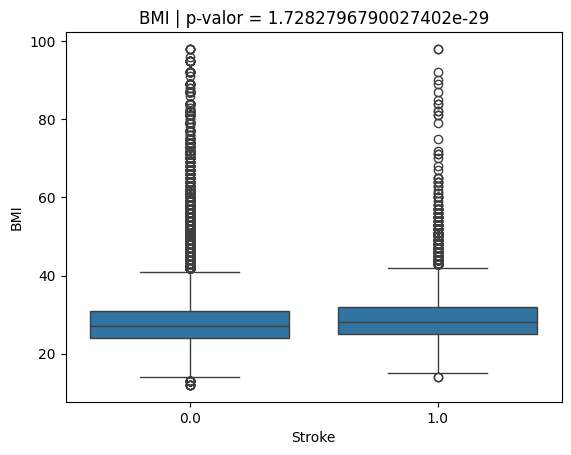

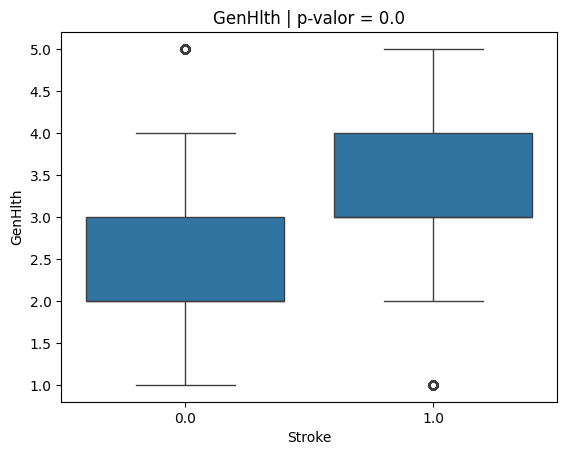

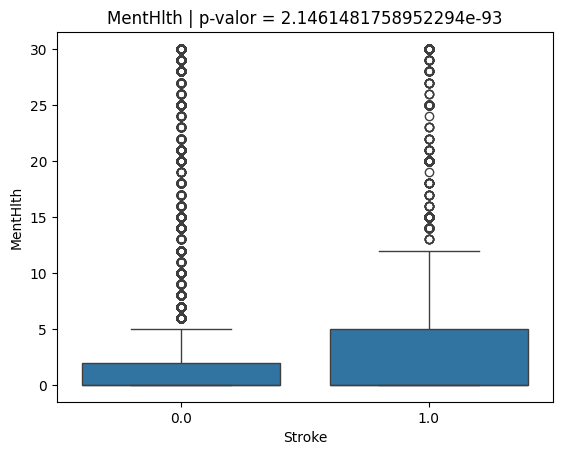

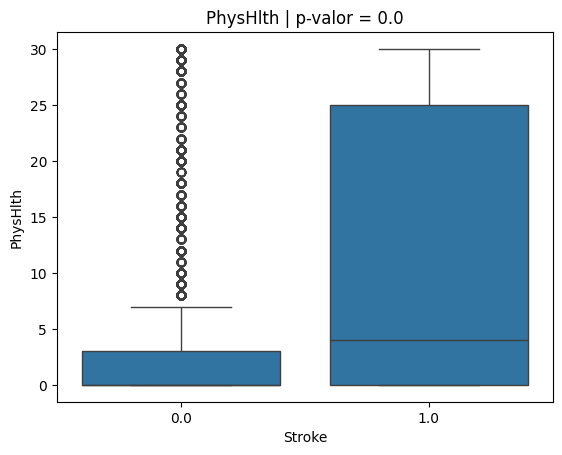

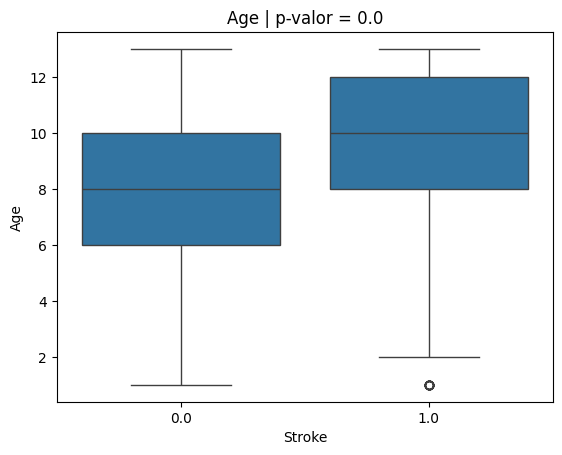

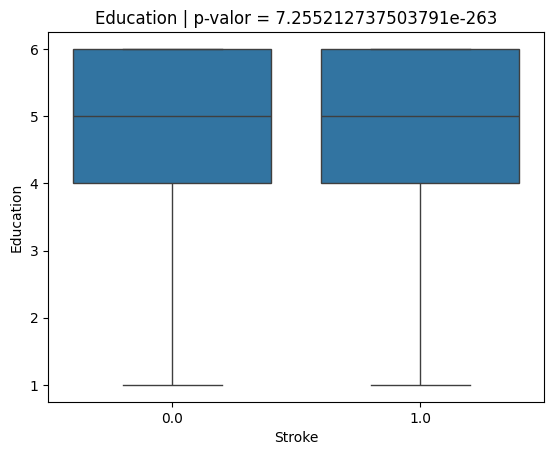

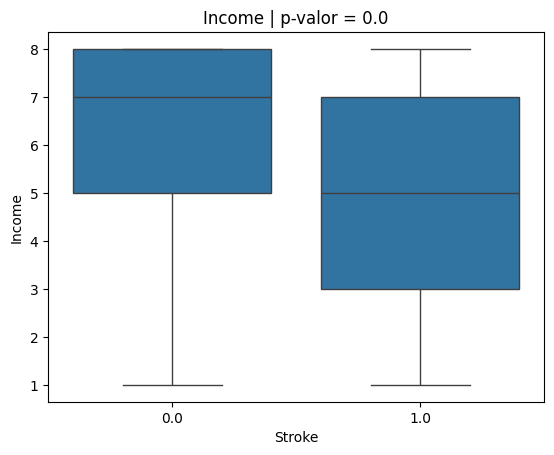

In [91]:
for feat in non_categorical:
    if feat == "Diabetes_012": continue
    fig, ax = plt.subplots()
    bp = sns.boxplot(data=df, x="Stroke", y=feat, ax=ax)
    pvalue = results_continuous[feat]
    ax.set_title(f"{feat} | p-valor = {pvalue}")

Features "Income", "Education", "Age", "GenHlth" e "Diabetes_012" são categóricas com mais de uma categoria.

Talvez seja melhor usar outros testes